In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Eyploration des fichier WBDSascii
df = pd.read_csv(r'C:\Users\Nathan\Desktop\WBDSascii\WBDS01walkO01Cgrf.txt',
                 sep = "	")
df.head()

df = pd.read_csv(r'C:\Users\Nathan\Desktop\WBDSascii\WBDS01walkO01Fgrf.txt',
                 sep = "	")
df.head()



,Time,Fx1,Fy1,Fz1,COPx1,COPy1,COPz1,Ty1,Fx2,Fy2,...,COPy4,COPz4,Ty4,Fx5,Fy5,Fz5,COPx5,COPy5,COPz5,Ty5
0,1,0.0,0.0,0.0,1506.0,0,-203.0,0.0,0.0,0.0,...,0,-203.0,0.0,0,0,0,300,0,200,0
1,2,-0.0,-0.0,-0.0,1506.0,0,-203.0,-0.0,-0.0,-0.0,...,0,-203.0,0.0,0,0,0,300,0,200,0
2,3,-0.0,-0.0,-0.0,1506.0,0,-203.0,-0.0,-0.0,-0.0,...,0,-203.0,0.0,0,0,0,300,0,200,0
3,4,-0.0,-0.0,-0.0,1506.0,0,-203.0,-0.0,-0.0,-0.0,...,0,-203.0,-0.0,0,0,0,300,0,200,0
4,5,-0.0,-0.0,-0.0,1506.0,0,-203.0,-0.0,-0.0,-0.0,...,0,-203.0,-0.0,0,0,0,300,0,200,0


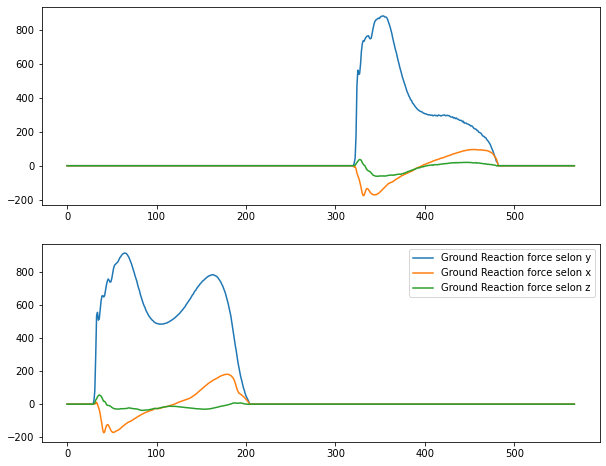

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df["Fy1"], label = "Ground Reaction force selon y")
plt.plot(df["Fx1"], label = "Ground Reaction force selon x")
plt.plot(df["Fz1"], label = "Ground Reaction force selon z")
plt.subplot(2,1,2)
plt.plot(df["Fy4"], label = "Ground Reaction force selon y")
plt.plot(df["Fx4"], label = "Ground Reaction force selon x")
plt.plot(df["Fz4"], label = "Ground Reaction force selon z")
plt.legend()
plt.show()

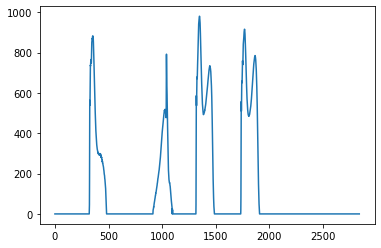

In [18]:
Grf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
plt.plot(Grf)

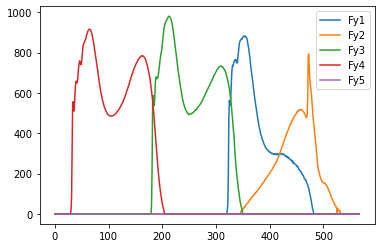

In [19]:
for grf in (df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]):
    plt.plot(grf, label = f'{grf.name}')
    plt.legend()

In [22]:
# Important sous forme de list !!!!!!!!!!!!!
VerticalGrf1 = df["Fy1"].tolist()
ApGrf1 = df["Fx1"].tolist()
VerticalGrf2 = df["Fy2"].tolist()
ApGrf2 = df["Fx2"].tolist()

In [23]:
from GetGrfValues import GetGrfValues
GrfValues1 = GetGrfValues(VerticalGrf1, ApGrf1)
GrfValues2 = GetGrfValues(VerticalGrf2, ApGrf2)

In [24]:
from DynamicSymetryFunctionProcedure import DynamicSymetryFunctionProcedure
DynamicSymetryFunctionProcedure(GrfValues1, GrfValues2)

,FirtPeak,MidstanceValley,SecondPeak,FirtPeakTimeTo,MidstanceValleyTimeTo,SecondPeakTimeTo,TimeFromMidstanceValleyToToeOff,FirtAndMidstanceImpulse,SecondAndPreswingImpulse,TotalVerticalGrfImpulse,BrakingPeak,PropulsivePeak,BrakePhaseDuration,PropulsivePhaseDuration,BrakePhaseTimeTo,PropulsivePhaseTimeTo,BrakingImpulse,PropulsiveImpulse
0,-527.38,-503.52,-633.54,0.2,0.2,1.6,2.1,-84.09,-1839.529,-1975.164,142.11,26.13,2.2,0.1,4.6,-2.9,522.374,-308.992


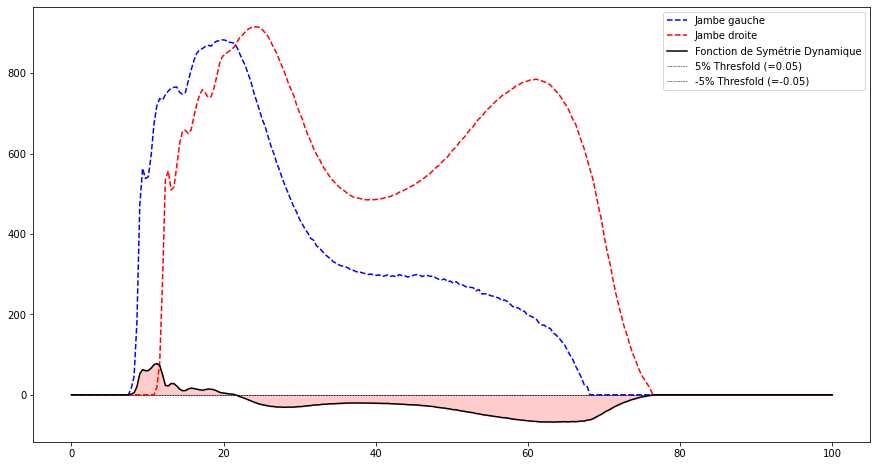

In [25]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunction
VerticalGrf1 = df["Fy1"][300:].tolist()
VerticalGrf2 = df["Fy4"][: -300].tolist()
PlotDynamicSymetryFunction(VerticalGrf1, VerticalGrf2)

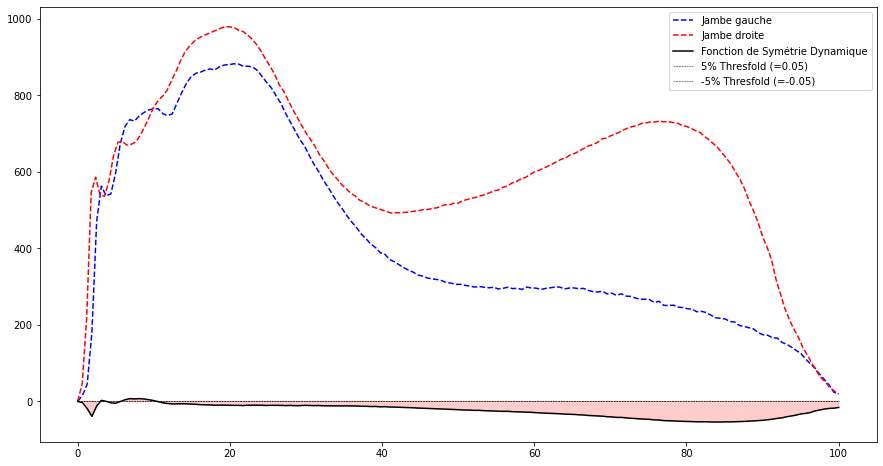

In [26]:
from MakeDictStep import MakeDictStep
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunction

VerticalGrf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
ApGrf = np.concatenate((df["Fx1"], df["Fx2"], df["Fx3"], df["Fx4"], df["Fx5"]))
VerticalGrfStep, ApGrfStep = MakeDictStep(VerticalGrf, ApGrf)

VerticalGrfRight = VerticalGrfStep[0]
VerticalGrfLeft = VerticalGrfStep[2]
PlotDynamicSymetryFunction(VerticalGrfRight, VerticalGrfLeft)

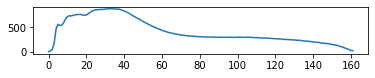

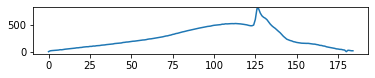

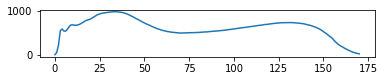

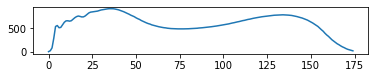

In [27]:
from MakeDictStep import MakeDictStep

VerticalGrf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
ApGrf = np.concatenate((df["Fx1"], df["Fx2"], df["Fx3"], df["Fx4"], df["Fx5"]))

VerticalGrfDict, ApGrf = MakeDictStep(VerticalGrf, ApGrf)

position = 0
for step in VerticalGrfDict:
    position += 1
    plt.subplot(len(VerticalGrfDict), 1, position)
    plt.plot(VerticalGrfDict[step])
    plt.show()